## Import libraries and data
In this section we will import all the necessary libraries and the csv files we will need later.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.dates import MonthLocator
import folium

In [2]:
listings=pd.read_csv('listings.csv')
calendar= pd.read_csv('calendar.csv.gz',compression='gzip',parse_dates=['date'])
reviews = pd.read_csv('reviews.csv',parse_dates=['date'])  

## Neighbourhood Listings in Descending Order

This is the list with the most popular neighbourhoods. We use the value_counts command in pandas, which calculates the number of listings per neighbourhood.

In [3]:
listings.neighbourhood.value_counts()

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕ

## Neighbourhood Prices in Descending Order

I group the data and find the median price, the mean price, the standard deviation of the price and the total number of listings per neighbourhood.
The table is in descending order by median price. The most expensive neighbourhoods are at the top of the table and the cheapest at the bottom.
We can see that the most expensive neighbourhood is 'ΡΗΓΙΛΛΗΣ' and the least expensive is 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ'. We order the table by the median price because it is a more representative measure than the mean, which can be affected by outliers.We also see that in some cases, such as 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', the standard deviation is very large, which tells us that there is a wide range of prices.

In [4]:
grouped_neighborhood=listings.groupby(['neighbourhood'])
neighb_info=grouped_neighborhood['price'].agg(['median','mean','std','count'])
neighb_info.columns=['Median Price','Mean Price','Std Price','Listings']
neighb_info.index.name='Neighbourhood'
neighb_info=neighb_info.sort_values(by='Median Price',ascending=False)

In [5]:
neighb_info

,Median Price,Mean Price,Std Price,Listings
Neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
ΖΑΠΠΕΙΟ,114.0,224.068323,641.163173,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.650662,229.183015,2416
ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162


## Availability per Day

We see that in the calendar there is information about the listings and the availabilities per night. We also create the table av_per_day, which contains the total availabilities per day, and we will use it later to create the graph we want.Using the calendar dataset and setting the column "available=t" means that we have only collected data where the availability is true. Finally, we use matplotlib to generate the graph we want, showing the number of listings available per day.

In [6]:
av_per_day=calendar[calendar['available']=='t']['date'].value_counts().sort_index()


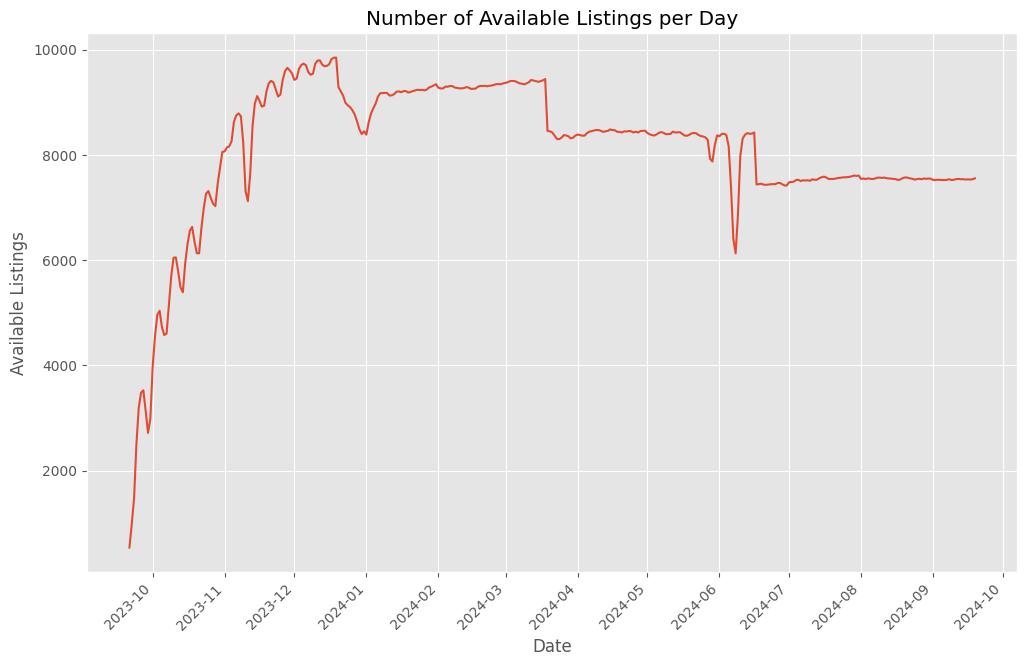

In [7]:
plt.figure(figsize=(12, 7))
plt.plot(av_per_day.index, av_per_day.values)
plt.title('Number of Available Listings per Day')
plt.xlabel('Date')
plt.ylabel('Available Listings')
#plt.grid(True)
plt.xticks(av_per_day.index, rotation=45, ha='right')


month_locator = MonthLocator()
plt.gca().xaxis.set_major_locator(month_locator)

Some interesting obserbations from this graph are

* Availability drops over Christmas period
* Early spring (15 March and later) availability decreases
* Another interesting observation is that there is a big drop in availability in the period 6/6/2024-10/6/2024. This can be linked to the concert of one of the most famous bands, Coldplay, which will take place in Athens on 8 & 9/6/2024. 

## Reviews, Occupacy per Listing, Average Income

### Histogram showing the number of reviews per listing

We want to create a histogram to show how the number of reviews is distributed per listing. First, we calculate the number of bins. To do this, we define the minimum and maximum number of reviews. We then round up the maximum number of reviews to the nearest hundred according to the instructions. 

In [8]:
min_reviews = listings['number_of_reviews'].min()
max_reviews = listings['number_of_reviews'].max()
len(np.arange(min_reviews,(round(max_reviews/100)*100),100))

9

Then, taking into account the number of bins calculated above, we plot the graph using the matplotlib library. We observe that the greatest concentration is in the first bin, so we end up with the reviews of most listings being between 0-100.

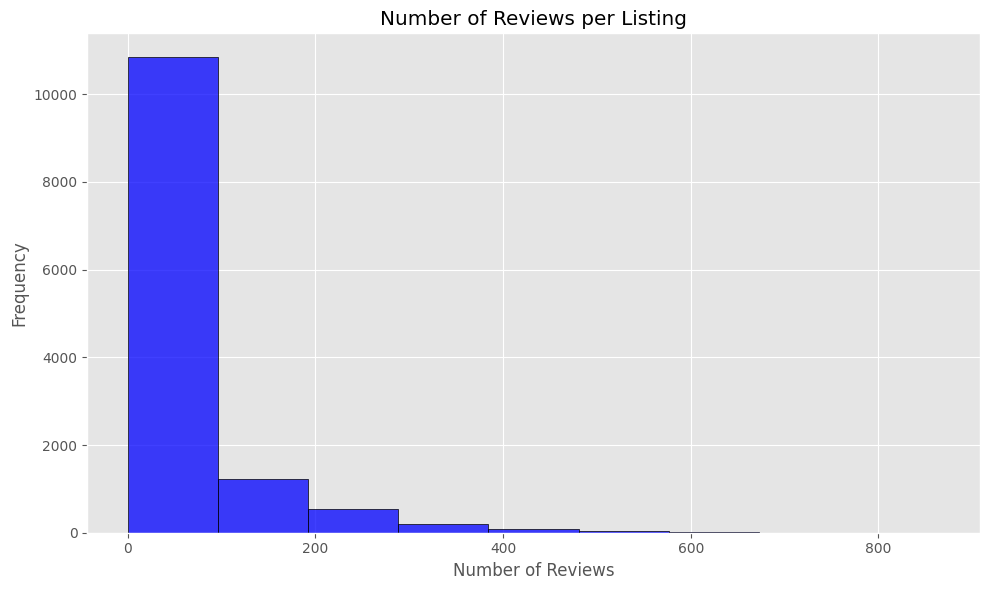

In [9]:



plt.figure(figsize=(10, 6))
ax=sns.histplot(data=listings, x='number_of_reviews', bins=len(np.arange(min_reviews,max_reviews,100)), kde=False, color='blue', edgecolor='black')
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)



# Show the plot
plt.tight_layout()
plt.show()


### Average occupacy per listing per month

First, we want to calculate the number of reviews per month and year for all listings. Since we have this information, we find the average number of reviews per month for all listings, regardless of the year.Since we found the average number of reviews per listing per month, we assume that bookings are half the number of reviews. Therefore, we multiply the reviews by 2 to obtain the average bookings per listing and per month.

#### Steps to create the table

We create 2 new columns with the month and year of each review, which will help us group them later.

In [10]:
reviews['month']=reviews['date'].dt.month
reviews['year']=reviews['date'].dt.year

In [11]:
reviews.head()

,listing_id,date,month,year
0,10595,2011-05-20,5,2011
1,10595,2012-08-15,8,2012
2,10595,2013-05-20,5,2013
3,10595,2014-05-04,5,2014
4,10595,2014-09-13,9,2014


In [12]:
reviews_grouped=reviews.groupby(['listing_id','month','year']).agg('count')

In this step we have the number of reviews per listing_id, month and year.

In [13]:
reviews_grouped

date
listing_id         month year      
10595              1     2019     1
                         2020     1
                         2023     1
                   2     2020     1
                         2023     3
...                             ...
975413215364080586 9     2023     4
975966554881091774 9     2023     1
976076532701121190 9     2023     1
977373669051180593 9     2023     2
979596287508787842 9     2023     1

[187631 rows x 1 columns]

In [14]:
review_tab_1=reviews_grouped.reset_index()
review_tab_1.columns=['listing_id','month','year','count1']

Since we are doing this, we use reset_index to get the data in the form we want.

In [15]:
review_tab_1

,listing_id,month,year,count1
0,10595,1,2019,1
1,10595,1,2020,1
2,10595,1,2023,1
3,10595,2,2020,1
4,10595,2,2023,3
...,...,...,...,...
187626,975413215364080586,9,2023,4
187627,975966554881091774,9,2023,1
187628,976076532701121190,9,2023,1
187629,977373669051180593,9,2023,2


Now we can group again to find the average number of reviews per month for each listing.

In [16]:
review_grouped_1=review_tab_1[['listing_id','month','count1']].groupby(['listing_id','month']).agg('mean')

In [17]:
review_tab_2=review_grouped_1.reset_index()
review_tab_2.columns=['listing_id','month','avg_reviews']

In [18]:
review_tab_2

,listing_id,month,avg_reviews
0,10595,1,1.0
1,10595,2,2.0
2,10595,3,1.0
3,10595,4,1.5
4,10595,5,1.2
...,...,...,...
80093,975413215364080586,9,4.0
80094,975966554881091774,9,1.0
80095,976076532701121190,9,1.0
80096,977373669051180593,9,2.0


Since we have this information, we get the number of bookings per month by multiplying the number of reviews by 2

In [19]:
bookings=review_tab_2
bookings['monthly_bookings']=bookings['avg_reviews']*2

#### Final table of bookings

This is the table showing the average occupancy per listing per month.

In [20]:
bookings

,listing_id,month,avg_reviews,monthly_bookings
0,10595,1,1.0,2.0
1,10595,2,2.0,4.0
2,10595,3,1.0,2.0
3,10595,4,1.5,3.0
4,10595,5,1.2,2.4
...,...,...,...,...
80093,975413215364080586,9,4.0,8.0
80094,975966554881091774,9,1.0,2.0
80095,976076532701121190,9,1.0,2.0
80096,977373669051180593,9,2.0,4.0


### Average Income per month

We assume that the price is in the listings file and that it is the average price of the house. We use the table of bookings calculated earlier and we join this table with the listings to link the listing with the respective bookings per month and the price of each house. Then, assuming that each booking is for a three nights stay, we calculate the average income per month.

In [21]:
bookings.rename(columns={'listing_id': 'id'},inplace=True)
income_temp= pd.merge(bookings,listings,how='left',on='id')
income=income_temp[['id','month','monthly_bookings','price']].copy()
income['income_monthly']=income['monthly_bookings']*3*income['price']

In [22]:
income

,id,month,monthly_bookings,price,income_monthly
0,10595,1,2.0,144,864.0
1,10595,2,4.0,144,1728.0
2,10595,3,2.0,144,864.0
3,10595,4,3.0,144,1296.0
4,10595,5,2.4,144,1036.8
...,...,...,...,...,...
80093,975413215364080586,9,8.0,56,1344.0
80094,975966554881091774,9,2.0,80,480.0
80095,976076532701121190,9,2.0,36,216.0
80096,977373669051180593,9,4.0,19,228.0


## Listings per Room Type

First, we count the number of listings per room type. Then, to calculate the percentage, we divide the previous counts by the total number of listings. Finally, we group the number of listings by neighbourhood and room type.

In [23]:
listings['room_type'].value_counts() # number of listings per room type

room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

In [24]:
(listings['room_type'].value_counts()/listings['room_type'].value_counts().sum())  #percentage of listings per room type

room_type
Entire home/apt    0.899421
Private room       0.085913
Hotel room         0.008105
Shared room        0.006561
Name: count, dtype: float64

We use the group by function to get the number of listings per neighbourhood and room type.

In [25]:
listings[['neighbourhood','room_type','id']]
neighb_room_type=listings[['neighbourhood','room_type','id']]
neighb_room_type=neighb_room_type.rename(columns={'id': 'cnt_of_listings'})

In [26]:
neighb_room_type.groupby(['neighbourhood','room_type']).agg('count')# number of listings per neihbourhood and room type

cnt_of_listings
neighbourhood                    room_type                       
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt               55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt               33
                                 Private room                   5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt              686
                                 Hotel room                     4
...                                                           ...
ΣΤΑΔΙΟ                           Private room                  11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                  Entire home/apt               73
                                 Hotel room                     4
                                 Private room                   4
                                 Shared room                    4

[111 rows x 1 columns]

## Price per day

We see that the price column in the calendar is a string. So we create the function price_value, which converts the string to a number

In [27]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180


In [28]:
#function to convert price from string to number

def price_value(x):
    # Remove any dollar signs and commas, and then convert to float
    x = x.replace('$', '').replace(',', '').strip()
    return float(x)

Then we apply this function and create a new column with numerical data. By using the groupby function, we have the average price per each day. 

In [29]:
calendar['price_value']=calendar['price'].apply(price_value)

In [30]:
calendar[['date','price_value']].groupby('date').agg('mean')

,price_value
date,
2023-09-21,113.107689
2023-09-22,116.212290
2023-09-23,116.264860
2023-09-24,113.045932
2023-09-25,111.629226
...,...
2024-09-15,110.923736
2024-09-16,110.402933
2024-09-17,110.385488


In [31]:
price_avg=calendar[['date','price_value']].groupby('date').agg('mean').sort_index()

Finally, we plot the results using matplotlib.

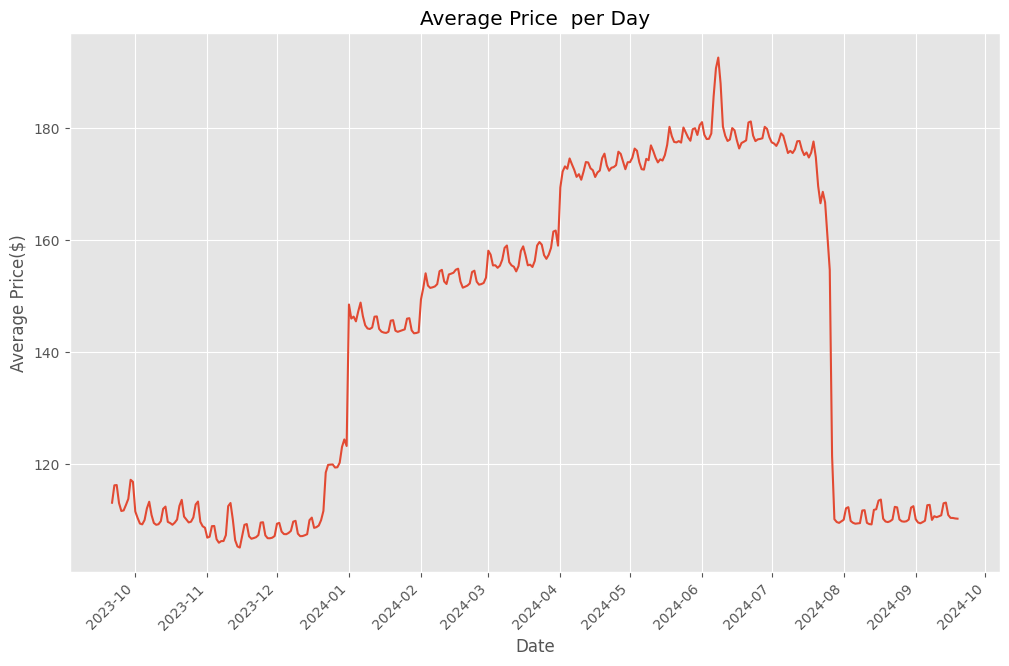

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(price_avg.index, price_avg.values)
plt.title('Average Price  per Day')
plt.xlabel('Date')
plt.ylabel('Average Price($)')
#plt.grid(True)
plt.xticks(price_avg.index, rotation=45, ha='right')


month_locator = MonthLocator()
plt.gca().xaxis.set_major_locator(month_locator)

## Listings per Host

We find the number of listings per host and name and create another column with the rank. The host with the most listings has the highest rank.

In [33]:
#Create the table with listings per host and respective rank

hosts=listings[['host_id','host_name','id']].groupby(['host_id','host_name']).agg('count').reset_index().sort_values(by='id',ascending=False).reset_index(drop=True)
hosts['rank']=hosts.index + 1  #create the rank
hosts.rename(columns={"id": "number_of_listings"},inplace=True)  #change column names
hosts

,host_id,host_name,number_of_listings,rank
0,20104194,Upstreet,114,1
1,113548208,Mgv,88,2
2,90390850,Evan&Anetta,78,3
3,748818,George,74,4
4,47267002,Tèo,61,5
...,...,...,...,...
5767,130728079,Iro And Manos,1,5768
5768,130646248,Fouad,1,5769
5769,130612477,Δήμητρα,1,5770
5770,130551473,Alex,1,5771


In [34]:
hosts['number_of_listings'].sum(),listings.shape

(12949, (12955, 18))

We then create a graph showing the distribution of listings per host and on a logarithmic scale.

Text(0, 0.5, 'Listings')

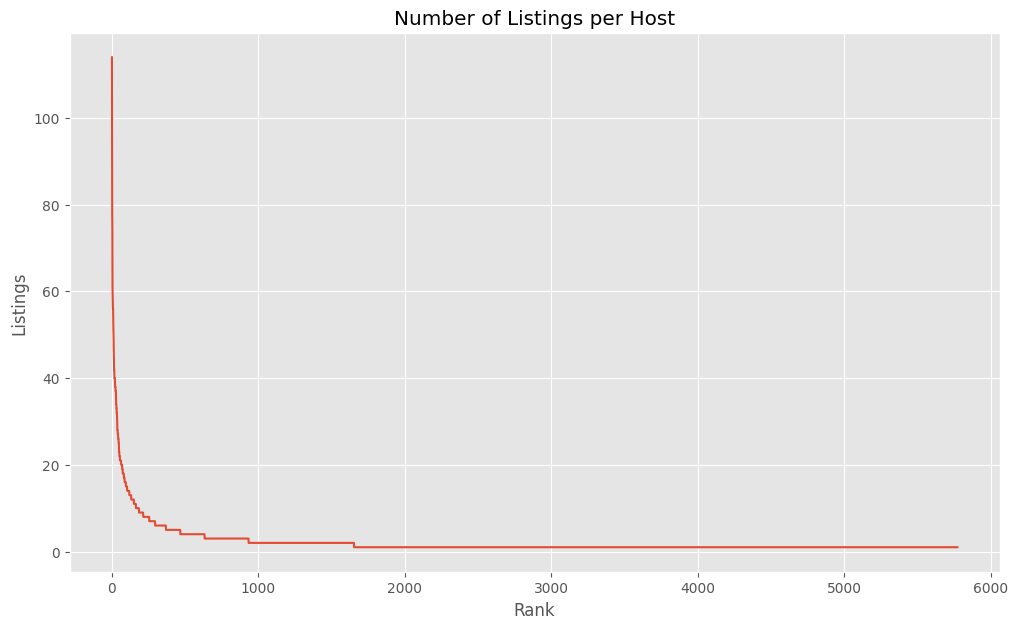

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(hosts['rank'], hosts['number_of_listings'])
plt.title('Number of Listings per Host')
plt.xlabel('Rank')
plt.ylabel('Listings')




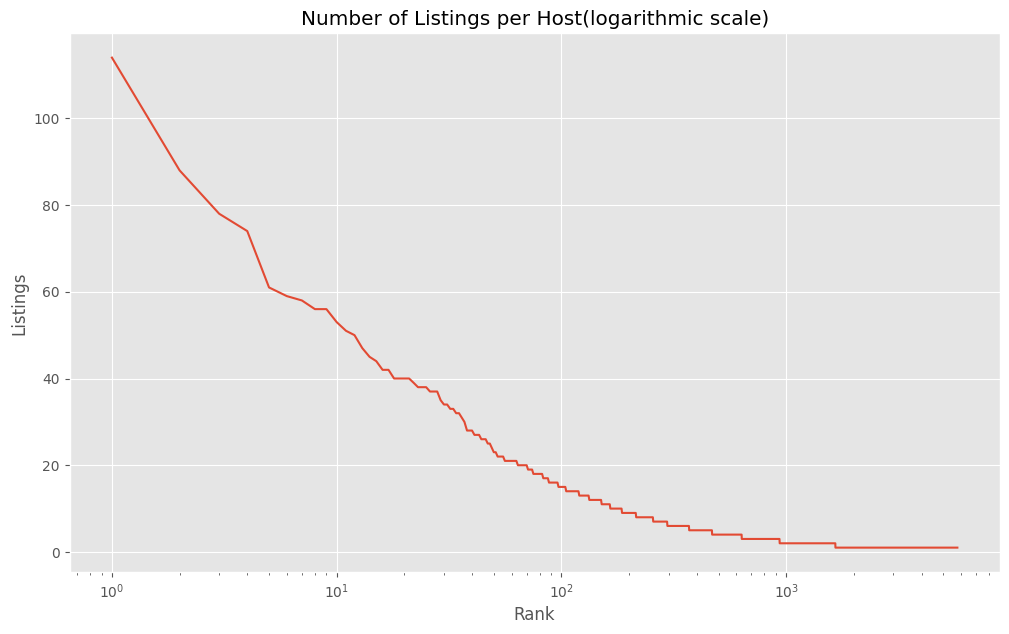

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(hosts['rank'], hosts['number_of_listings'])
plt.title('Number of Listings per Host(logarithmic scale)')
plt.xlabel('Rank')
plt.ylabel('Listings')

plt.xscale('log')

## Visualize Listings

First, we create a new column that displays the price with the symbol €, as we will need it later for the description. Then we use the folium library. We initialise the map with some coordinates from the centre of Athens. We set the minimum zoom to 12 and the maximum to 15. And then with a for loop we insert a marker for each listing with the respective coordinates and we also use some HTML to display a short description of each listing by clicking on the marker. Finally, we save the interactive map to a file called 'Airbnb_map.html'.

In [37]:
listings['price_euro'] = listings['price'].apply(lambda x: f'{x} €')  # Add the symbol of €

In [38]:
m = folium.Map([37.98863, 23.76527], zoom_start=12,min_zoom=12,max_zoom=15)


radius = 3  # We adjust the radius as needed
color = 'blue'
fill_color = 'white'


for i in range(listings.shape[0]):
    
    folium.CircleMarker(
        location=[listings['latitude'][i],listings['longitude'][i]],
        radius=radius,
        color=color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.8,
        tooltip='Click for Information',
        popup="<p><strong>Description:</strong></p>"+listings['name'][i] + "<p><strong>Neighborhood:</strong></p>" + listings['neighbourhood'][i] + "<p><strong>Price/Night:</strong></p>"+ listings['price_euro'][i] 
    ).add_to(m)


folium.LayerControl().add_to(m)
#m
m.save('Airbnb_map.html')